In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas_datareader import data

In [2]:
data_inicio = '2017-01-02'
data_fim = '2021-09-06'

In [3]:
df = data.DataReader('petr4.sa', 'yahoo', data_inicio, data_fim)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,14.700000,14.600000,14.640000,14.660000,7525700.0,12.417701
2017-01-03,15.650000,14.950000,14.950000,15.500000,39947800.0,13.129221
2017-01-04,15.680000,15.310000,15.450000,15.500000,37071700.0,13.129221
2017-01-05,15.910000,15.620000,15.700000,15.750000,47586300.0,13.340982
2017-01-06,15.920000,15.500000,15.780000,15.660000,25592000.0,13.264747
...,...,...,...,...,...,...
2021-08-31,28.230000,26.990000,28.200001,27.190001,110574300.0,27.190001
2021-09-01,27.340000,26.330000,27.320000,27.040001,69430400.0,27.040001
2021-09-02,27.350000,26.459999,27.000000,26.600000,56052000.0,26.600000


In [4]:
# usando apenas o fechamento como feature para fazer o modelo

df_close = df[['Close']]

In [5]:
df_close

,Close
Date,
2017-01-02,14.660000
2017-01-03,15.500000
2017-01-04,15.500000
2017-01-05,15.750000
2017-01-06,15.660000
...,...
2021-08-31,27.190001
2021-09-01,27.040001
2021-09-02,26.600000


Text(0.5, 0, 'Data')

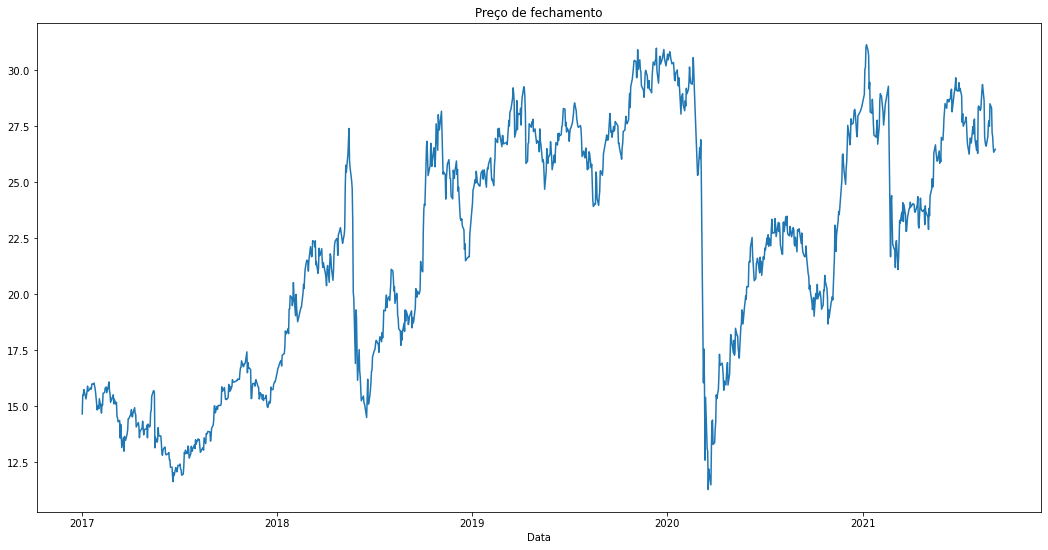

In [6]:
plt.figure(figsize=(18,9))
plt.title('Preço de fechamento')
plt.plot(df_close.Close)
plt.xlabel('Data')

In [7]:
n_rows = len(df)
rows_train = round(0.7 * n_rows)
rows_test = n_rows - rows_train
rows_validate =  n_rows -1

info = (
    f"linhas treino= 0:{rows_train}"
    f" linhas teste= {rows_train}:{rows_train + rows_test}"
    f" linhas validação= {rows_validate}:{n_rows}"
)

info

'linhas treino= 0:813 linhas teste= 813:1161 linhas validação= 1160:1161'

In [8]:
#normalizando os dados

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_close)

In [9]:
train = df_scaled[:rows_train]
test = df_scaled[rows_train : rows_train + rows_test]
print(len(train))
print(len(test))

813
348


In [10]:
#array de valores para df matrix
def create_df(df, steps=1):
    dataX, dataY = [], []
    for i in range(len(df)-steps-1):
        a = df[i:(i+steps), 0 ]
        dataX.append(a)
        dataY.append(df[i + steps, 0 ])
    return np.array(dataX), np.array(dataY)

In [11]:
#dados de treino e teste
steps = 20
X_train, Y_train = create_df(train, steps)
X_test, Y_test = create_df(test, steps)


In [12]:
# formatando os dados para o jeito que o modelo espera

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [13]:
#rede neural
model = Sequential()
model.add(LSTM(35, return_sequences=True, input_shape = (steps, 1)))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35))
model.add(Dropout(0.2))
model.add(Dense(1))



In [14]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 35)            5180      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 35)            9940      
_________________________________________________________________
lstm_2 (LSTM)                (None, 35)                9940      
_________________________________________________________________
dropout (Dropout)            (None, 35)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 36        
Total params: 25,096
Trainable params: 25,096
Non-trainable params: 0
_________________________________________________________________


In [15]:
#treinando o modelo
validation = model.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs=100, batch_size=20, verbose=2)

Epoch 1/100
40/40 - 5s - loss: 0.3601 - val_loss: 0.0965
Epoch 2/100
40/40 - 1s - loss: 0.1440 - val_loss: 0.0642
Epoch 3/100
40/40 - 1s - loss: 0.0994 - val_loss: 0.0531
Epoch 4/100
40/40 - 1s - loss: 0.0797 - val_loss: 0.0547
Epoch 5/100
40/40 - 1s - loss: 0.0691 - val_loss: 0.0736
Epoch 6/100
40/40 - 1s - loss: 0.0667 - val_loss: 0.0501
Epoch 7/100
40/40 - 1s - loss: 0.0580 - val_loss: 0.0453
Epoch 8/100
40/40 - 1s - loss: 0.0573 - val_loss: 0.0374
Epoch 9/100
40/40 - 1s - loss: 0.0533 - val_loss: 0.0408
Epoch 10/100
40/40 - 1s - loss: 0.0481 - val_loss: 0.0370
Epoch 11/100
40/40 - 1s - loss: 0.0493 - val_loss: 0.0346
Epoch 12/100
40/40 - 1s - loss: 0.0468 - val_loss: 0.0394
Epoch 13/100
40/40 - 1s - loss: 0.0478 - val_loss: 0.0511
Epoch 14/100
40/40 - 1s - loss: 0.0450 - val_loss: 0.0309
Epoch 15/100
40/40 - 1s - loss: 0.0393 - val_loss: 0.0322
Epoch 16/100
40/40 - 1s - loss: 0.0424 - val_loss: 0.0306
Epoch 17/100
40/40 - 1s - loss: 0.0386 - val_loss: 0.0317
Epoch 18/100
40/40 - 1s

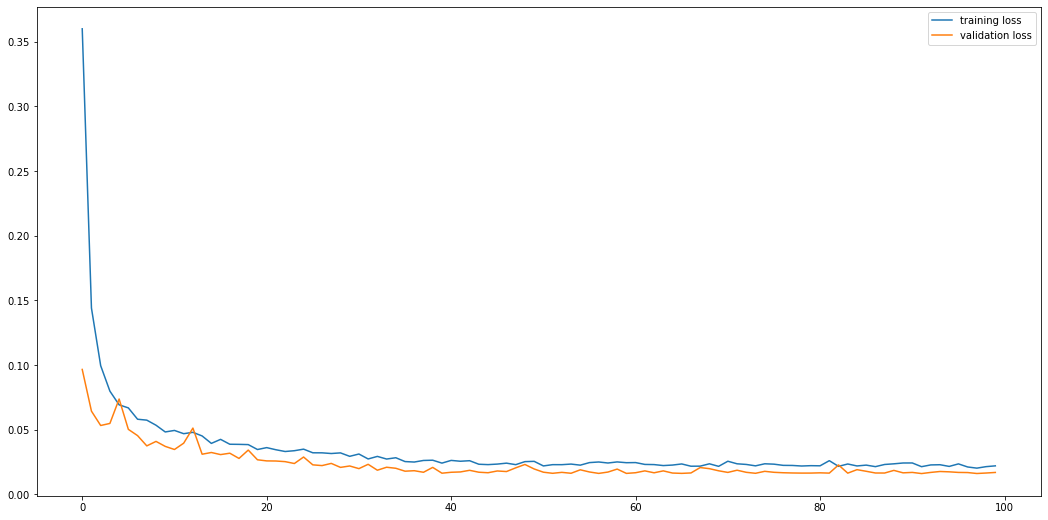

In [16]:
plt.figure(figsize=(18,9))
plt.plot(validation.history['loss'], label = 'training loss')
plt.plot(validation.history['val_loss'], label = 'validation loss')
plt.legend()

In [17]:
##fazendo a previsão

prev = model.predict(X_test)
prev = scaler.inverse_transform(prev)

In [18]:
length_test = len(test)
# pegar os ultimos 15 dias que são os tamanho do step
days_input_steps = length_test - steps

input_steps = test[days_input_steps:]
input_steps = np.array(input_steps).reshape(1,-1)
input_steps


array([[1.16243248, 1.23447787, 1.3139127 , 1.36009571, 1.22893578,
        0.93151743, 0.88718178, 0.85947169, 0.85208259, 0.92967006,
        1.03311991, 1.06082965, 1.016494  , 1.20122604, 1.16612686,
        0.96107453, 0.93336479, 0.85208259, 0.80220485, 0.82621987]])

In [19]:
list_output_steps = list(input_steps)
list_output_steps = list_output_steps[0].tolist()
list_output_steps

[1.1624324822956142,
 1.234477866953814,
 1.3139127025248614,
 1.36009571368492,
 1.2289357787691784,
 0.9315174264953198,
 0.8871817780634729,
 0.8594716894887072,
 0.8520825909242725,
 0.9296700637671079,
 1.0331199101080843,
 1.060829646334437,
 1.01649399790259,
 1.2012260425428256,
 1.1661268554036253,
 0.9610745254498845,
 0.9333647892235317,
 0.8520825909242725,
 0.8022048543077899,
 0.8262198650777188]

In [20]:
#loop para prever D+10
pred_output = []
i = 0
n_future = 10
while(i<n_future):
    
    if(len(list_output_steps) > steps):
       input_steps = np.array(list_output_steps[1:])
       print('{} dia. Valores de entrada -> {}'.format(i, input_steps))
       input_steps = input_steps.reshape(1, -1)
       input_steps = input_steps.reshape((1,steps, 1))
       pred = model.predict(input_steps, verbose = 0)
       print('{} dia. Valor previsto -> {}'.format(i, pred))
       list_output_steps.extend(pred[0].tolist())
       list_output_steps = list_output_steps[1:]
       pred_output.extend(pred.tolist())
       i = i+1
    else:
       input_steps = input_steps.reshape((1, steps, 1))
       pred = model.predict(input_steps, verbose = 0)
       print(pred[0])
       list_output_steps.extend(pred[0].tolist())
       print(len(list_output_steps))
       pred_output.extend(pred.tolist())
       i = i + 1
print(pred_output)

        

[0.79947674]
21
1 dia. Valores de entrada -> [1.23447787 1.3139127  1.36009571 1.22893578 0.93151743 0.88718178
 0.85947169 0.85208259 0.92967006 1.03311991 1.06082965 1.016494
 1.20122604 1.16612686 0.96107453 0.93336479 0.85208259 0.80220485
 0.82621987 0.79947674]
1 dia. Valor previsto -> [[0.7475859]]
2 dia. Valores de entrada -> [1.3139127  1.36009571 1.22893578 0.93151743 0.88718178 0.85947169
 0.85208259 0.92967006 1.03311991 1.06082965 1.016494   1.20122604
 1.16612686 0.96107453 0.93336479 0.85208259 0.80220485 0.82621987
 0.79947674 0.74758589]
2 dia. Valor previsto -> [[0.67547333]]
3 dia. Valores de entrada -> [1.36009571 1.22893578 0.93151743 0.88718178 0.85947169 0.85208259
 0.92967006 1.03311991 1.06082965 1.016494   1.20122604 1.16612686
 0.96107453 0.93336479 0.85208259 0.80220485 0.82621987 0.79947674
 0.74758589 0.67547333]
3 dia. Valor previsto -> [[0.59064925]]
4 dia. Valores de entrada -> [1.22893578 0.93151743 0.88718178 0.85947169 0.85208259 0.92967006
 1.033119

In [21]:
# transforma a saida
prev = scaler.inverse_transform(pred_output)
prev = np.array(prev).reshape(1,-1)
list_output_prev = list(prev)
list_output_prev = prev[0].tolist()
list_output_prev

[26.31523198472364,
 26.034334048644407,
 25.64397102087272,
 25.184797381557516,
 24.674003200055104,
 24.111087071110312,
 23.49276114430475,
 22.82301827036733,
 22.11847169288542,
 21.408517262907193,
 20.730324548863578,
 20.12092405505103,
 19.610059534844872,
 19.217402755490813]

In [22]:
df['data_pregao'] = df.index
df

,High,Low,Open,Close,Volume,Adj Close,data_pregao
Date,,,,,,,
2017-01-02,14.700000,14.600000,14.640000,14.660000,7525700.0,12.417701,2017-01-02
2017-01-03,15.650000,14.950000,14.950000,15.500000,39947800.0,13.129221,2017-01-03
2017-01-04,15.680000,15.310000,15.450000,15.500000,37071700.0,13.129221,2017-01-04
2017-01-05,15.910000,15.620000,15.700000,15.750000,47586300.0,13.340982,2017-01-05
2017-01-06,15.920000,15.500000,15.780000,15.660000,25592000.0,13.264747,2017-01-06
...,...,...,...,...,...,...,...
2021-08-31,28.230000,26.990000,28.200001,27.190001,110574300.0,27.190001,2021-08-31
2021-09-01,27.340000,26.330000,27.320000,27.040001,69430400.0,27.040001,2021-09-01
2021-09-02,27.350000,26.459999,27.000000,26.600000,56052000.0,26.600000,2021-09-02


In [23]:
#pegar as datas de previsão
dates = pd.to_datetime(df['data_pregao'])
predict_dates = pd.date_range(list(dates)[-1] + pd.DateOffset(2), periods = 14, freq = 'b').tolist()
predict_dates


[Timestamp('2021-09-08 00:00:00', freq='B'),
 Timestamp('2021-09-09 00:00:00', freq='B'),
 Timestamp('2021-09-10 00:00:00', freq='B'),
 Timestamp('2021-09-13 00:00:00', freq='B'),
 Timestamp('2021-09-14 00:00:00', freq='B'),
 Timestamp('2021-09-15 00:00:00', freq='B'),
 Timestamp('2021-09-16 00:00:00', freq='B'),
 Timestamp('2021-09-17 00:00:00', freq='B'),
 Timestamp('2021-09-20 00:00:00', freq='B'),
 Timestamp('2021-09-21 00:00:00', freq='B'),
 Timestamp('2021-09-22 00:00:00', freq='B'),
 Timestamp('2021-09-23 00:00:00', freq='B'),
 Timestamp('2021-09-24 00:00:00', freq='B'),
 Timestamp('2021-09-27 00:00:00', freq='B')]

In [24]:
#df de previsão
forecast_dates = []
for i in predict_dates:
    forecast_dates.append(i.date())
df_forecast = pd.DataFrame({'data_pregao': np.array(forecast_dates), 'Close': list_output_prev})
df_forecast = df_forecast.set_index(pd.DatetimeIndex(df_forecast['data_pregao'].values))
df_forecast.drop('data_pregao', axis=1, inplace=True)
df_forecast

,Close
2021-09-08,26.315232
2021-09-09,26.034334
2021-09-10,25.643971
2021-09-13,25.184797
2021-09-14,24.674003
2021-09-15,24.111087
2021-09-16,23.492761
2021-09-17,22.823018
2021-09-20,22.118472
2021-09-21,21.408517


In [25]:
df_2021 = df[ (df['data_pregao'] > '2021-01-01')]
df_2021_close = df_2021[['data_pregao', 'Close']]
df_2021_close = df_2021_close.set_index(pd.DatetimeIndex(df_2021_close['data_pregao'].values))
df_2021_close.drop('data_pregao', axis= 1, inplace=True)
df_2021_close

,Close
2021-01-04,28.910000
2021-01-05,30.040001
2021-01-06,30.100000
2021-01-07,31.000000
2021-01-08,31.120001
...,...
2021-08-31,27.190001
2021-09-01,27.040001
2021-09-02,26.600000
2021-09-03,26.330000


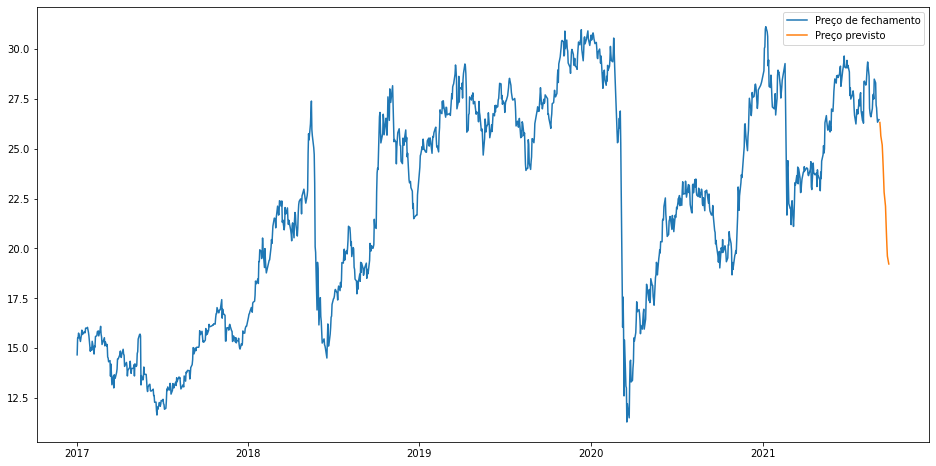

In [26]:
plt.figure(figsize=(16,8))
plt.plot(df_close['Close'])
plt.plot(df_forecast['Close'])
plt.legend(['Preço de fechamento', 'Preço previsto'])
plt.show()

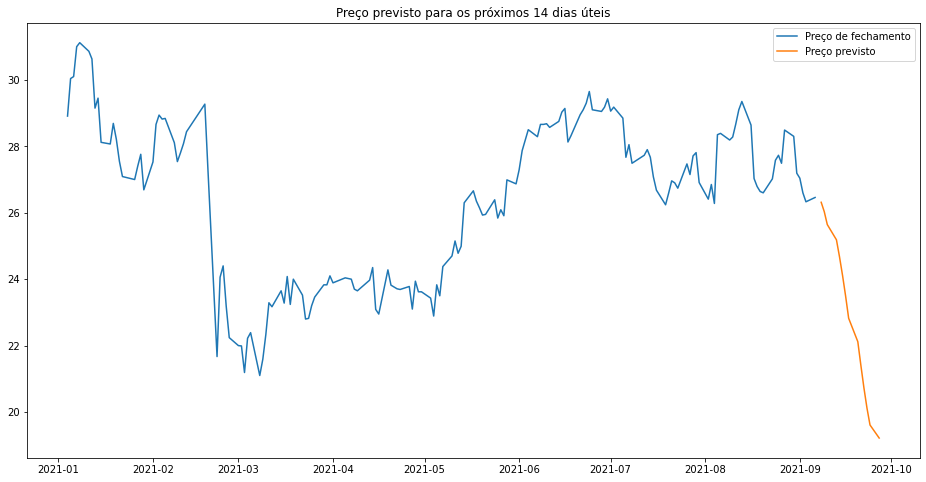

In [28]:
plt.figure(figsize=(16,8))
plt.plot(df_2021_close['Close'])
plt.plot(df_forecast['Close'])
plt.legend(['Preço de fechamento', 'Preço previsto'])
plt.title('Preço previsto para os próximos 14 dias úteis')
plt.show()